<a href="https://colab.research.google.com/github/marant482/MLclass/blob/main/Lab05_kernel-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




#1.
Najpierw zobaczmy jak wygląda sytuacja, gdy najpierw przekształcimy dane i wytrenujemy SVM na trzech wymiarach. Zwizualizowałem to na trzecim wykresie (wykres można obracać), pod ostatnim kodem. Tak jak możnaby się spodziewać w tej sytuacji mamy do czynienia z płaszczyzną oddzielającą te chmury punktów. Dlaczego nie działa to w taki sam sposób przy przekształceniu jądrowym?


Przekształcenie $ \phi(x_1,x_2) = (x_1^2, \sqrt{2} x_1 x_2, x_2^2) $, przekształca płaszczyznę $ \mathbb{R}^ 2 $ na *dwuwymiarową rozmaitość w trzech wymiarach (w kształcie stożka)*. Nie jest to zatem cała trójwymiarowa przestrzeń. Granica decyzyjna w 3 wymiarach jest faktycznie płaszczyzną dwuwymiarową, ale to co my widzimy przy kernel trick, to jej przecięcie z naszą rozmaitością, które jest rozmaitością jednowymiarową. Dlatego nawet przy wizualizacji w trzech wymiarach, obliczając granicę decyzyjną z kernel trick, sama granica decyzyjna będzie w całości zawarta w rozmaitości stworzonej przez nasze przekształcenie, będzie więc jedowymiarową rozmaitością. Różnica wynika zatem z tego, że kernel trick pozwala na obliczanie tej granicy decyzyjnej, bez potrzeby faktycznego przekształcania danych do 3 wymiarów, operujemy więc cały czas na dwuwymiarowej rozmaitości, stąd nie widzimy płaszczyzny w trzech wymiarach, jak przy ręcznym przekształceniu danych. Przy powrocie do oryginalnych współrzędnych, granice decyzyjne będą identyczne.


#2.
Tak jak powiedzieliśmy wcześniej przekształcenie $ \phi(x_1,x_2) = (x_1^2, \sqrt{2} x_1 x_2, x_2^2) $, przekształca płaszczyznę $ \mathbb{R}^ 2 $ na dwuwymiarową rozmaitość (w kształcie stożka).
Ustaliliśmy, że granica decyzyjna w trójwymiarowej przestrzeni cech jest hiperpłaszczyzną:
$$ w_1 z_1 + w_2 z_2 + w_3 z_3 + b = 0 $$
Zobaczmy zatem jak równanie tej płaszczyzny wygląda w oryginalnych współrzędnych.
Podstawiamy definicje $z_1, z_2, z_3$ z naszego odwzorowania $\phi(x_1,x_2)$ z powrotem do równania hiperpłaszczyzny:
 $$\phi(x_1,x_2) = (z_1, z_2, z_3) = (x_1^2, \sqrt{2} x_1 x_2, x_2^2) $$
Podstawiając je do równania hiperpłaszczyzny, otrzymujemy:
$$ w_1 x_1^2 + (\sqrt{2} w_2) x_1 x_2 + w_3 x_2^2 + b = 0 $$

To jest równanie kwadratowe zmiennych $x_1$ i $x_2$.

Jak ta krzywa wygląda dla różnych parametrów możemy zobaczyć tutaj:
[desmos](https://www.desmos.com/calculator/aspxrsbsiu?lang=pl)

W szczególności dobrze wizualizuje to poniższy obrazek (z wikipedii) reprezentujący wszystkie możliwe krzywe stożkowe, czyli właśnie wszystkie kształty, które możemy uzyskać przecinając płaszczyznę dwywumiarową z rozmaitością w kształcie stożka. (oczywiście w naszym przypadku stożek "jest odwrócony i nie ma końca", więc zawsze będą to koła i elipsy)


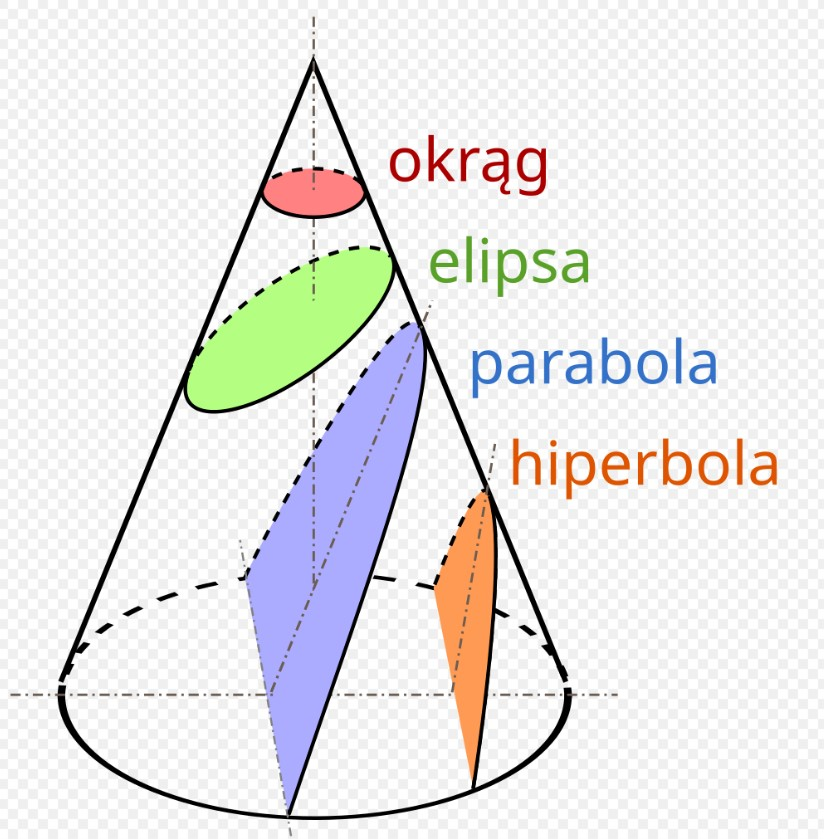

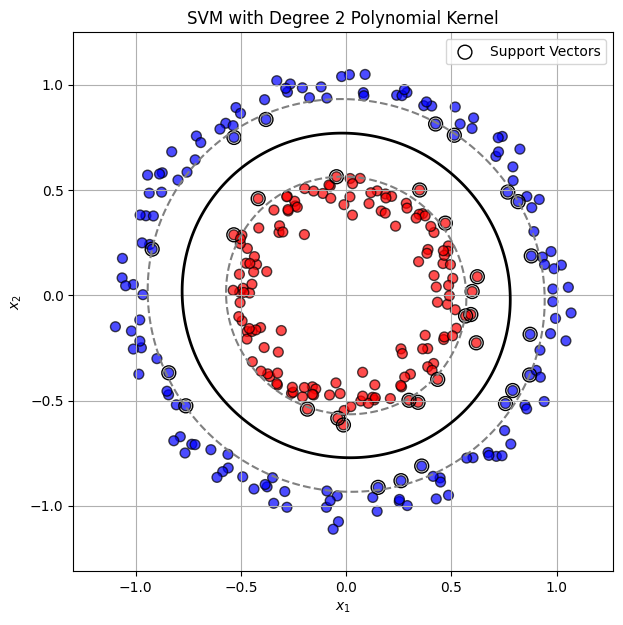

In [ ]:
# KOD Z ZAJĘĆ

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()



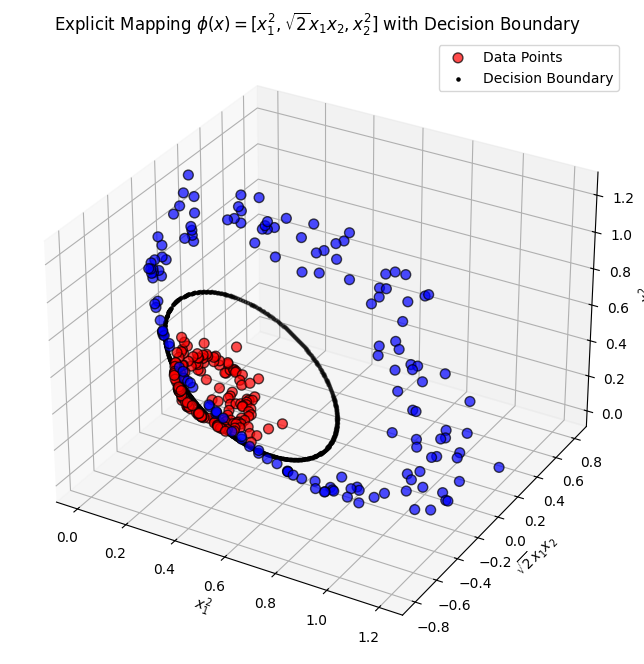

In [ ]:
# KOD Z ZAJĘĆ

# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping $\phi(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]$ with Decision Boundary')
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2} x_1 x_2$')
ax.set_zlabel('$x_2^2$')

# Add legend and grid
ax.legend()
ax.grid(True)

plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

X, y = make_circles(n_samples=200, noise=0.08, factor=0.4, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# przekształcenie danych do przestrzeni cech 3D
def poly_kernel_map(X_in):
    x1 = X_in[:, 0]
    x2 = X_in[:, 1]
    return np.array([
        x1**2,
        np.sqrt(2) * x1 * x2,
        x2**2
    ]).T

Z_mapped = poly_kernel_map(X_scaled)

# SVM na danych 3D
linear_svm_3d = SVC(kernel='linear', C=1.0)
linear_svm_3d.fit(Z_mapped, y)

w = linear_svm_3d.coef_[0]
b = linear_svm_3d.intercept_[0]

# wizualizacja 3W z Plotly

color_map = {0: 'red', 1: 'blue'}
point_colors = [color_map[label] for label in y]

scatter_trace = go.Scatter3d(
    x=Z_mapped[:, 0],
    y=Z_mapped[:, 1],
    z=Z_mapped[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=point_colors,
        opacity=0.8,
        line=dict(color='black', width=0.5)
    ),
    name='Dane przekształcone $\phi(x)$'
)

z1_min, z1_max = Z_mapped[:, 0].min() - 0.1, Z_mapped[:, 0].max() + 0.1
z2_min, z2_max = Z_mapped[:, 1].min() - 0.1, Z_mapped[:, 1].max() + 0.1
z1_grid, z2_grid = np.meshgrid(np.linspace(z1_min, z1_max, 30),
                               np.linspace(z2_min, z2_max, 30))

z3_plane = np.zeros_like(z1_grid)
valid_plane = False
if abs(w[2]) > 1e-6:
    z3_plane = (-w[0] * z1_grid - w[1] * z2_grid - b) / w[2]
    valid_plane = True
else:
    print("Ostrzeżenie: Współczynnik w3 jest bliski zeru. Płaszczyzna może nie być poprawnie wyświetlona.")

plane_trace = None
if valid_plane:
    plane_trace = go.Surface(
        x=z1_grid,
        y=z2_grid,
        z=z3_plane,
        opacity=0.4,
        colorscale='gray',
        showscale=False,
        name='Hiperpłaszczyzna SVM',
        hoverinfo='skip'
    )

data_traces = [scatter_trace]
if plane_trace is not None:
    data_traces.append(plane_trace)

fig = go.Figure(data=data_traces)

fig.update_layout(
    title='Interaktywny wykres 3W: Dane $\phi(x)$ i hiperpłaszczyzna SVM',
    scene=dict(
        xaxis_title='z1 = x1^2',
        yaxis_title='z2 = sqrt(2)*x1*x2',
        zaxis_title='z3 = x2^2',

    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

fig.show()